<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Step 2: Examine the structure of the data

# Display column names
print("Column names:")
print(df.columns)

# Display data types and non-null counts
print("\nDataset info:")
df.info()

# Display dataset shape (rows, columns)
print("\nDataset shape:")
print(df.shape)

Column names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='str', length=114)

Dataset info:
<class 'pandas.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), str(100)
memory usage: 56.9 MB

Dataset shape:
(65437, 114)


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
# Identify missing values in the dataset

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# ---- Handle missing values ----
# Strategy:
# - Numerical columns → impute with median
# - Categorical columns → impute with mode

# Separate numeric and categorical columns (future-proof)
numeric_cols = df.select_dtypes(include="number").columns
categorical_cols = df.select_dtypes(include=["object", "string"]).columns

# Impute numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Missing values per column:
Series([], dtype: int64)

Missing values after imputation:
0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
# Examine key columns: Employment, JobSat, and YearsCodePro
# Calculate value counts to understand distributions

print("Employment value counts:")
print(df["Employment"].value_counts())

print("\nJob Satisfaction (JobSat) value counts:")
print(df["JobSat"].value_counts())

print("\nYears of Professional Coding Experience (YearsCodePro) value counts:")
print(df["YearsCodePro"].value_counts())

Employment value counts:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


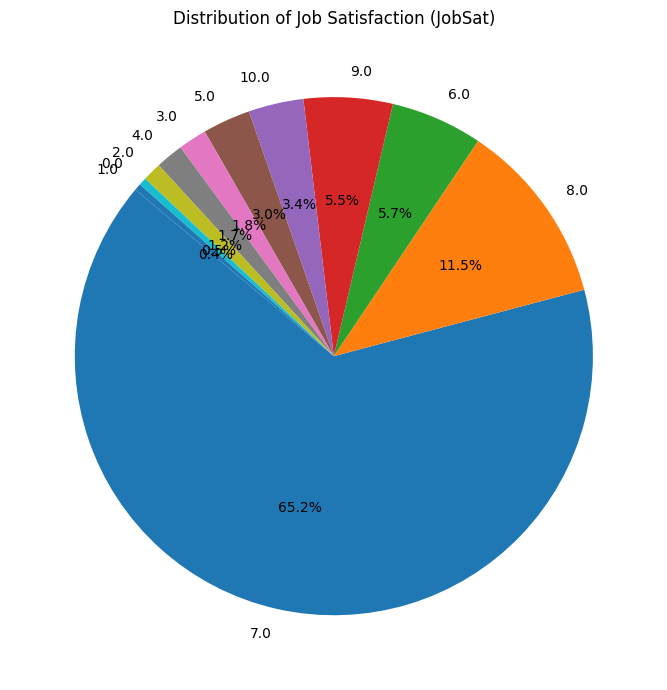

In [7]:
# Visualize the distribution of JobSat using a pie chart

import matplotlib.pyplot as plt

# Drop missing values
jobsat_df = df.dropna(subset=["JobSat"])

# Calculate value counts
jobsat_counts = jobsat_df["JobSat"].value_counts()

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    jobsat_counts,
    labels=jobsat_counts.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Distribution of Job Satisfaction (JobSat)")
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


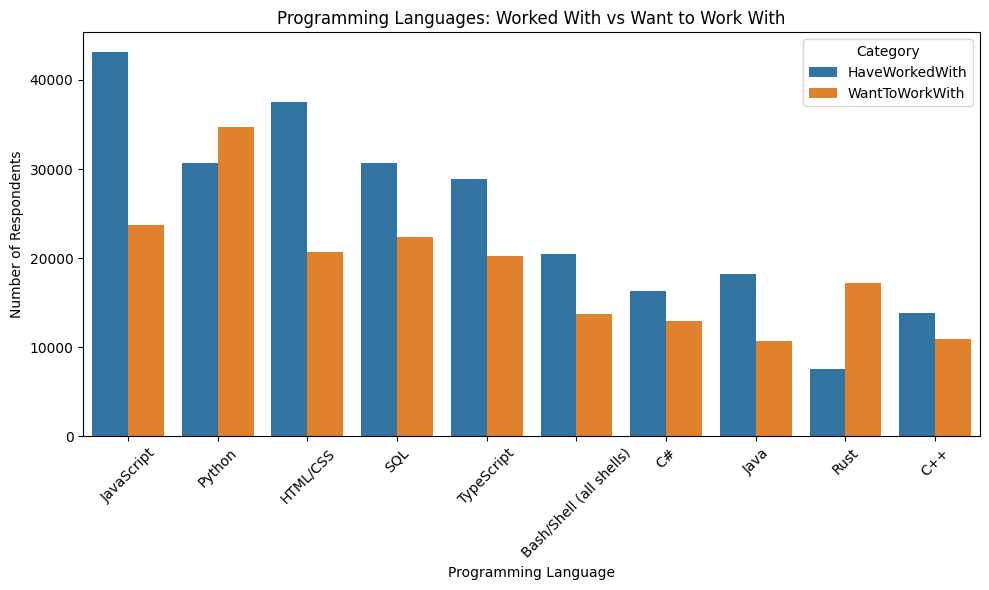

In [8]:
# Compare frequency of programming languages:
# LanguageHaveWorkedWith vs LanguageWantToWorkWith
# Visualization: Grouped bar chart (robust, no extra libraries)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keep relevant columns and drop missing values
lang_df = df[["LanguageHaveWorkedWith", "LanguageWantToWorkWith"]].dropna()

# Split and explode languages
have = (
    lang_df["LanguageHaveWorkedWith"]
    .str.split(";")
    .explode()
    .value_counts()
    .rename("HaveWorkedWith")
)

want = (
    lang_df["LanguageWantToWorkWith"]
    .str.split(";")
    .explode()
    .value_counts()
    .rename("WantToWorkWith")
)

# Combine counts into one DataFrame
language_compare = pd.concat([have, want], axis=1).fillna(0)

# Focus on top 10 languages by overall popularity
top_languages = (
    language_compare.sum(axis=1)
    .sort_values(ascending=False)
    .head(10)
    .index
)

plot_df = (
    language_compare.loc[top_languages]
    .reset_index()
    .melt(
        id_vars="index",
        value_vars=["HaveWorkedWith", "WantToWorkWith"],
        var_name="Category",
        value_name="Count"
    )
    .rename(columns={"index": "Language"})
)

# ---- Grouped bar chart ----
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x="Language",
    y="Count",
    hue="Category"
)

plt.title("Programming Languages: Worked With vs Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


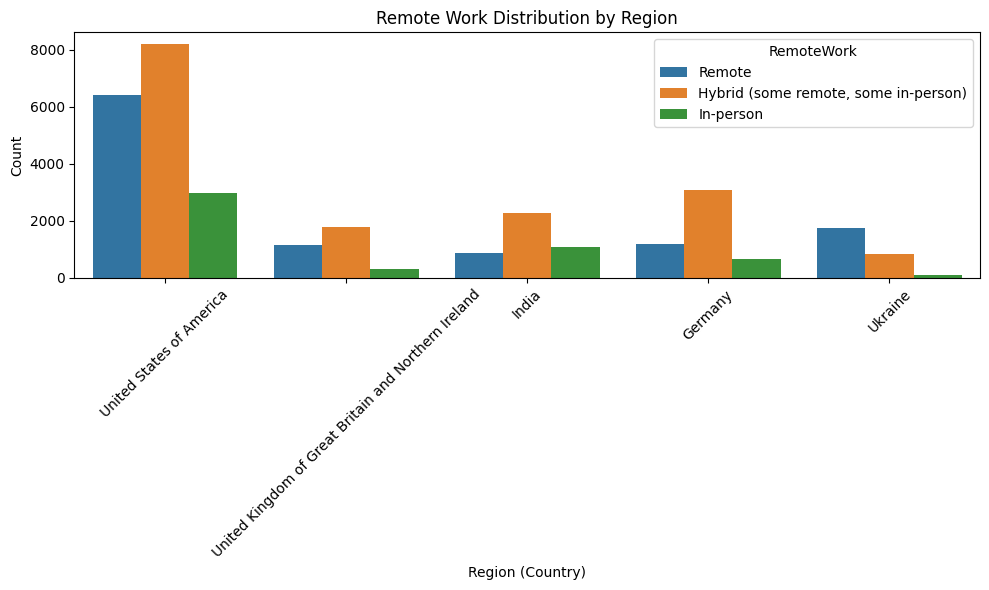

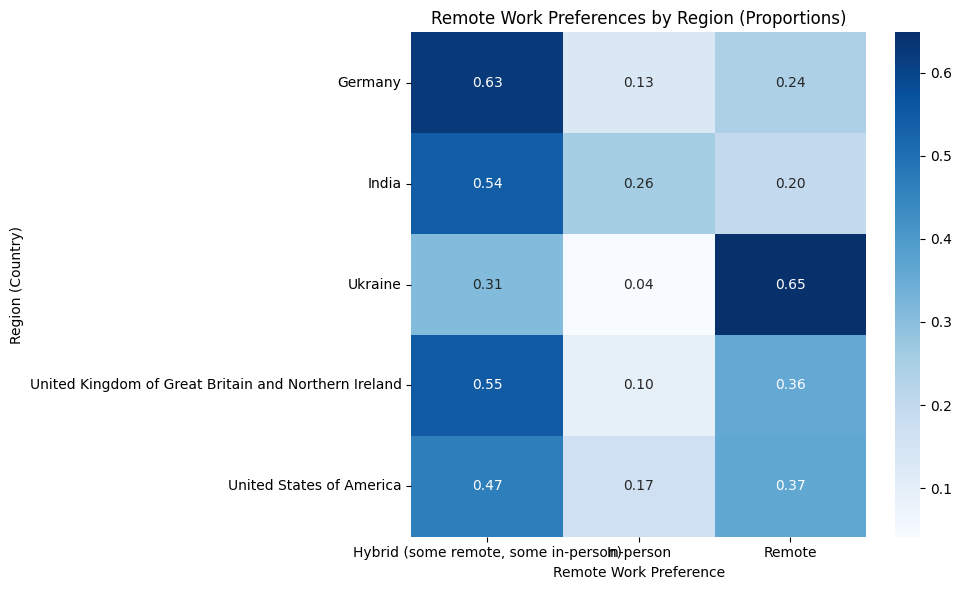

In [9]:
# Visualize the distribution of RemoteWork by region (Country)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep relevant columns and drop missing values
remote_region_df = df.dropna(subset=["Country", "RemoteWork"])

# Focus on top regions to keep the plot readable
top_countries = (
    remote_region_df["Country"]
    .value_counts()
    .head(5)
    .index
)

remote_region_df = remote_region_df[
    remote_region_df["Country"].isin(top_countries)
]

# ---- Option 1: Grouped bar chart ----
plt.figure(figsize=(10, 6))
sns.countplot(
    data=remote_region_df,
    x="Country",
    hue="RemoteWork"
)

plt.title("Remote Work Distribution by Region")
plt.xlabel("Region (Country)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- Option 2: Heatmap (proportions) ----
remote_heatmap = pd.crosstab(
    remote_region_df["Country"],
    remote_region_df["RemoteWork"],
    normalize="index"
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    remote_heatmap,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)

plt.title("Remote Work Preferences by Region (Proportions)")
plt.xlabel("Remote Work Preference")
plt.ylabel("Region (Country)")
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [12]:
# Analyze correlation between JobSat and YearsCodePro WITHOUT SciPy

import pandas as pd

# Ensure YearsCodePro is numeric
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Drop rows with missing values
corr_df = df.dropna(subset=["JobSat", "YearsCodePro"])

# ---- Spearman correlation (manual via ranking) ----
spearman_corr = (
    corr_df["YearsCodePro"].rank()
    .corr(corr_df["JobSat"].rank())
)

# ---- Pearson correlation ----
pearson_corr = corr_df["YearsCodePro"].corr(corr_df["JobSat"])

print("Spearman Correlation (manual):", spearman_corr)
print("Pearson Correlation:", pearson_corr)

Spearman Correlation (manual): 0.10647562176737671
Pearson Correlation: 0.06649076820056883


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cross-tabulation (Employment vs. Education Level):
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                     

/tmp/ipykernel_2928/808257944.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


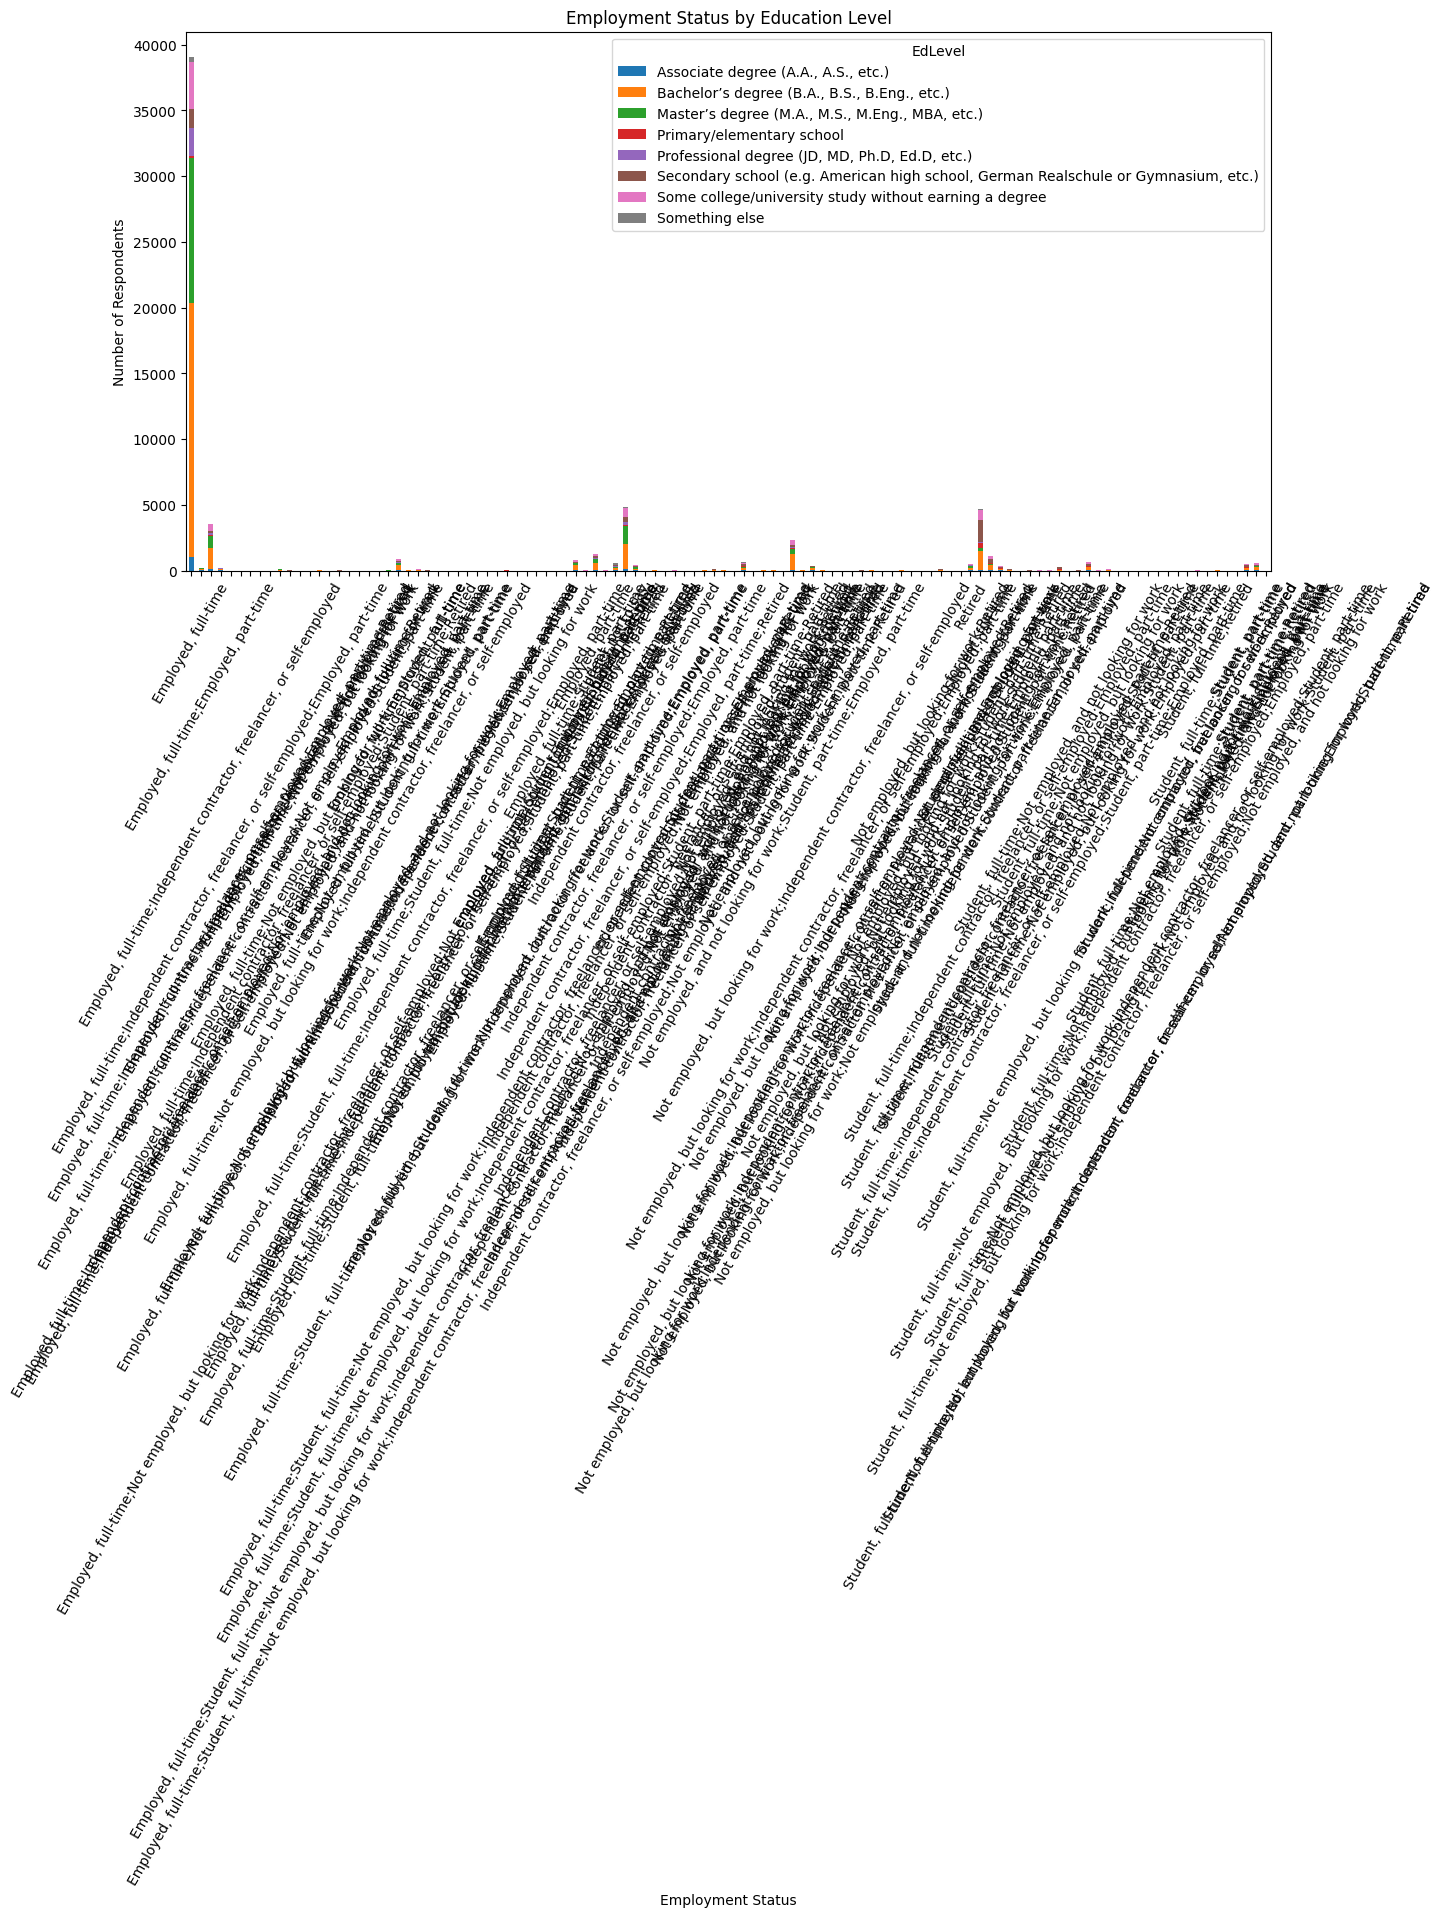

In [14]:
# Step 9: Cross-tabulation Analysis (Employment vs. Education Level)

import pandas as pd
import matplotlib.pyplot as plt

# Keep relevant columns and drop missing values
ct_df = df.dropna(subset=["Employment", "EdLevel"])

# Create cross-tabulation (counts)
employment_education_ct = pd.crosstab(
    ct_df["Employment"],
    ct_df["EdLevel"]
)

print("Cross-tabulation (Employment vs. Education Level):")
print(employment_education_ct)

# ---- Stacked bar plot ----
employment_education_ct.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7)
)

plt.title("Employment Status by Education Level")
plt.xlabel("Employment Status")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [15]:
output_file = "stack_overflow_survey_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"Cleaned dataset saved as '{output_file}'")

Cleaned dataset saved as 'stack_overflow_survey_cleaned.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
